# CS210 SPRING 2019 - SAMPLE FINAL PROJECT
# BARCELONA POPULATION DATASET EXPLORATION

# GROUP MEMBERS:
SILA KUZU
SUDE KARATAG
ZEYNEP DAGCI

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime
import seaborn as sns
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

sns.set(style="darkgrid")

%matplotlib inline

In [84]:
from os.path import join
from pprint import pprint

In [85]:
d_path = "./data"
d_file = "population.csv"
#d_file2= "immigrants_emigrants_by_sex.csv"
#d_file3 = "immigrants_emigrants_by_age.csv"
#d_file4 = "deaths.csv"
#d_file5 = "births.csv"
d_file6 = "air_quality_Nov2017.csv"

In [86]:
df_CoL = pd.read_csv(join(d_path, d_file))

In [87]:
df_WhR = pd.read_csv(join(d_path, d_file6))

In [88]:
#df3 = pd.read_csv(join(d_path, d_file5))

In [89]:
df_CoL.head()

,Year,District.Code,District.Name,Neighborhood.Code,Neighborhood.Name,Gender,Age,Number
0,2017,1,Ciutat Vella,1,el Raval,Male,0-4,224
1,2017,1,Ciutat Vella,2,el Barri Gòtic,Male,0-4,50
2,2017,1,Ciutat Vella,3,la Barceloneta,Male,0-4,43
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Male,0-4,95
4,2017,2,Eixample,5,el Fort Pienc,Male,0-4,124


In [90]:
df_WhR.head()

,Station,Air Quality,Longitude,Latitude,O3 Hour,O3 Quality,O3 Value,NO2 Hour,NO2 Quality,NO2 Value,PM10 Hour,PM10 Quality,PM10 Value,Generated,Date Time
0,Barcelona - Sants,Good,2.1331,41.3788,NaN,NaN,NaN,0h,Good,84.0,NaN,NaN,NaN,01/11/2018 0:00,1541027104
1,Barcelona - Eixample,Moderate,2.1538,41.3853,0h,Good,1.0,0h,Moderate,113.0,0h,Good,36.0,01/11/2018 0:00,1541027104
2,Barcelona - Gràcia,Good,2.1534,41.3987,0h,Good,10.0,0h,Good,73.0,NaN,NaN,NaN,01/11/2018 0:00,1541027104
3,Barcelona - Ciutadella,Good,2.1874,41.3864,0h,Good,2.0,0h,Good,86.0,NaN,NaN,NaN,01/11/2018 0:00,1541027104
4,Barcelona - Vall Hebron,Good,2.1480,41.4261,0h,Good,7.0,0h,Good,69.0,NaN,NaN,NaN,01/11/2018 0:00,1541027104


In [91]:
#df3.head()

# Project Description

...

# Dataset

We obtained the datasets from [Kaggle](https://www.kaggle.com/andytran11996/cost-of-living/version/3#cost-of-living-2017.csv) [Kaggle](https://www.kaggle.com/unsdsn/world-happiness#2017.csv)

In [59]:
df_CoL.describe()

,Year,District.Code,Neighborhood.Code,Number
count,70080.000000,70080.000000,70080.000000,70080.000000
mean,2015.000000,6.246575,37.000000,114.844720
std,1.414224,2.788356,21.071458,96.540389
min,2013.000000,1.000000,1.000000,0.000000
25%,2014.000000,4.000000,19.000000,43.000000
50%,2015.000000,7.000000,37.000000,92.000000
75%,2016.000000,8.000000,55.000000,162.000000
max,2017.000000,10.000000,73.000000,777.000000


In [60]:
df_WhR.describe()

,Longitude,Latitude,O3 Value,NO2 Value,PM10 Value,Date Time
count,5744.00000,5744.000000,4101.000000,5460.000000,3647.000000,5.744000e+03
mean,2.15240,13877.827714,34.082907,35.740293,16.590074,1.542323e+09
std,0.02859,74410.803168,22.960687,22.357262,8.065424,7.483961e+05
min,2.11510,41.378800,1.000000,1.000000,2.000000,1.541027e+09
25%,2.13080,41.386400,14.000000,17.000000,10.000000,1.541675e+09
50%,2.15070,41.398700,34.000000,33.000000,15.000000,1.542325e+09
75%,2.16220,41.418300,52.000000,52.000000,22.000000,1.542971e+09
max,2.20450,414261.000000,100.000000,117.000000,44.000000,1.543616e+09


In [61]:
n_rows, n_columns = df_CoL.shape  # get the shape of dataframe
print("number of rows: {}, number of columns: {}".format(n_rows, n_columns))

number of rows: 70080, number of columns: 8


In [62]:
n_rows, n_columns = df_WhR.shape  # get the shape of dataframe
print("number of rows: {}, number of columns: {}".format(n_rows, n_columns))

number of rows: 5744, number of columns: 15


In [63]:
df_CoL["Country"].unique().shape  # getting unique country count

KeyError: 'Country'

In [64]:
df_WhR["Country"].unique().shape  # getting unique player count

KeyError: 'Country'

In [65]:
df_CoL.dtypes  # data types of each column

Year                  int64
District.Code         int64
District.Name        object
Neighborhood.Code     int64
Neighborhood.Name    object
Gender               object
Age                  object
Number                int64
dtype: object

In [66]:
df_WhR.dtypes  # data types of each column

Station          object
Air Quality      object
Longitude       float64
Latitude        float64
O3 Hour          object
O3 Quality       object
O3 Value        float64
NO2 Hour         object
NO2 Quality      object
NO2 Value       float64
PM10 Hour        object
PM10 Quality     object
PM10 Value      float64
Generated        object
Date Time         int64
dtype: object

# Preprocessing

Here, we will first take a look at the NaN values and try come up with different methods to deal with them.

# Dealing with NaN values 


In [67]:
df_CoL.isnull().sum()  # NaN counts in each column

Year                 0
District.Code        0
District.Name        0
Neighborhood.Code    0
Neighborhood.Name    0
Gender               0
Age                  0
Number               0
dtype: int64

In [68]:
df_WhR.isnull().sum()  # NaN counts in each column

Station            0
Air Quality        0
Longitude          0
Latitude           0
O3 Hour         1476
O3 Quality      1476
O3 Value        1643
NO2 Hour          55
NO2 Quality       55
NO2 Value        284
PM10 Hour       2022
PM10 Quality    2022
PM10 Value      2097
Generated          0
Date Time          0
dtype: int64

In [69]:
na_ratios = df_CoL.isnull().sum() / n_rows  # finding the NaN value ratio of each column
                                        # it returns a series object with column names as indices
na_ratios

Year                 0.0
District.Code        0.0
District.Name        0.0
Neighborhood.Code    0.0
Neighborhood.Name    0.0
Gender               0.0
Age                  0.0
Number               0.0
dtype: float64

In [70]:
na_ratios = df_WhR.isnull().sum() / n_rows  # finding the NaN value ratio of each column
                                        # it returns a series object with column names as indices
na_ratios

Station         0.000000
Air Quality     0.000000
Longitude       0.000000
Latitude        0.000000
O3 Hour         0.256964
O3 Quality      0.256964
O3 Value        0.286038
NO2 Hour        0.009575
NO2 Quality     0.009575
NO2 Value       0.049443
PM10 Hour       0.352019
PM10 Quality    0.352019
PM10 Value      0.365077
Generated       0.000000
Date Time       0.000000
dtype: float64

# Data Exploration


In [71]:
sns.distplot(df_CoL["Cost of Living Plus Rent Index"], norm_hist=True)  # points

plt.xlabel("Cost of Living")
plt.title("Distribution of Cost of Living")
plt.show()

KeyError: 'Cost of Living Plus Rent Index'

In [72]:
sns.distplot(df_WhR["Happiness.Score"], norm_hist=True)  # points

plt.xlabel("Happiness Score")
plt.title("Distribution of Happiness Scores")
plt.show()

KeyError: 'Happiness.Score'

# Extracting Some Insights

In [60]:
top5CostofLiving_Countries = df_CoL.groupby(by="Country").sum()["Cost of Living Plus Rent Index"].sort_values(ascending=False)[:5]
print(top5CostofLiving_Countries)

Country
 United States     7559.39
 Canada            1537.42
 United Kingdom    1200.99
 Germany            777.03
 Australia          701.42
Name: Cost of Living Plus Rent Index, dtype: float64


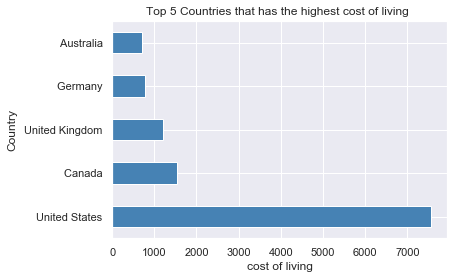

In [61]:
top5CostofLiving_Countries.plot(kind="barh", color="steelblue")                                  

plt.xlabel("cost of living")
plt.title("Top 5 Countries that has the highest cost of living ")
plt.show()

In [66]:
top5CostofLiving_Cities = df_CoL.groupby(by="City").sum()["Cost of Living Plus Rent Index"].sort_values(ascending=False)[:5]
print(top5CostofLiving_Cities)

City
Hamilton     237.67
London       130.22
Portland     129.80
San Jose     125.82
Melbourne    124.85
Name: Cost of Living Plus Rent Index, dtype: float64


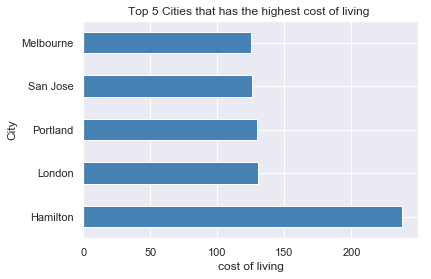

In [67]:
top5CostofLiving_Cities.plot(kind="barh", color="steelblue")                                  

plt.xlabel("cost of living")
plt.title("Top 5 Cities that has the highest cost of living ")
plt.show()

In [55]:
top5HappyCountries = df_WhR.groupby(by="Country").sum()["Happiness.Score"].sort_values(ascending=False)[:5]
print(top5HappyCountries)

Country
Norway         7.537
Denmark        7.522
Iceland        7.504
Switzerland    7.494
Finland        7.469
Name: Happiness.Score, dtype: float64


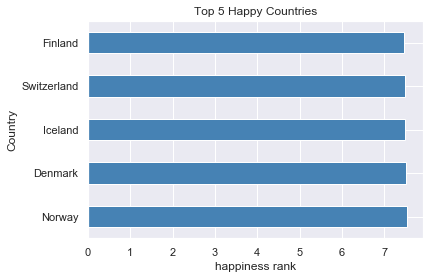

In [56]:
top5HappyCountries.plot(kind="barh", color="steelblue")                                  

plt.xlabel("happiness rank")
plt.title("Top 5 Happy Countries")
plt.show()